In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import subprocess
import os

In [6]:
wd = os.getcwd()
file = os.listdir(wd)
wd

'/Users/sanduhr'

In [8]:
df = pd.read_csv('Desktop/Channel_attribution.csv')
cols = df.columns
for col in cols:
    df[col] = df[col].astype(str)
    df[col] = df[col].map(lambda x: str(x)[:-2] if '.' in x else str(x))

In [9]:
df['Path'] = ''
for i in df.index:
    #df.at[i, 'Path'] = 'Start'
    for x in cols:
        df.at[i, 'Path'] = df.at[i, 'Path'] + df.at[i, x] + ' > '

In [10]:
df['Path'] = df['Path'].map(lambda x: x.split(' > 21')[0])
df['Conversion'] = 1

In [12]:
df = df[['Path', 'Conversion']]
df = df.groupby('Path').sum().reset_index()
df.to_csv('Desktop/Paths.csv', index=False)

<class 'pandas.core.series.Series'>


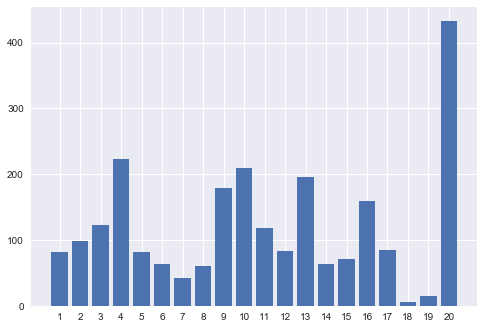

In [41]:
path2script = 'Desktop/MarkovChainAttributionModeling/Markov.r'
subprocess.call(['Rscript', '--vanilla', path2script], shell=True)
markov = pd.read_csv('Desktop/MarkovOutputConversionvalues.csv')


import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, show

# Select only the necessary columns and rename them
markov = markov[['channel_name', 'total_conversions']]
markov.columns = ['Channel', 'Conversion']
markov

print (type(markov['Channel']))
markov_plot = plt.bar(markov['Channel'], markov['Conversion'],width=0.8)
plt.xticks(markov['Channel'])
plt.show()